# Requirements 설치

In [4]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 사용할 패키지

In [5]:
import tensorflow as tf
import numpy as np
import os, glob
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import pyramid_reduce, resize
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from keras.models import Model, load_model
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D, concatenate, BatchNormalization, Conv2DTranspose
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(1)

# 데이터 전처리

In [6]:
img_list = sorted(glob.glob('2d_images/*.tif'))
mask_list = sorted(glob.glob('2d_masks/*.tif'))

x_data, y_data = np.empty((2, 267, 256, 256, 1), dtype=np.float32)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(256, 256, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(256, 256, 1), preserve_range=True)
    y_data[i] = img

x_data /= 255.    
y_data /= 255.

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

In [7]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


# X 와 y 값이되는 이미지 보기

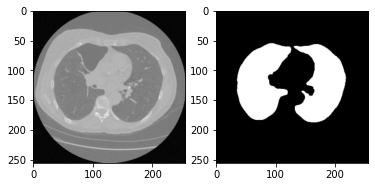

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_train[0].squeeze(), cmap='gray')
ax[1].imshow(y_train[0].squeeze(), cmap='gray')

# 저장된 모델 불러오기

In [13]:
# 저장된 모델 불러오기
model = load_model('final_model')

# 불러온 모델 평가
model.evaluate(x_val, y_val)

1/1 [==============================] - 2s 2s/step - loss: 0.0548 - accuracy: 0.9594


[0.054846640676259995, 0.9594494700431824]

In [14]:
# # 저장된 가중치 로드
# model.load_weights('model_weights.h5')

# # 모델 재평가
# model.evaluate(x_val, y_val)

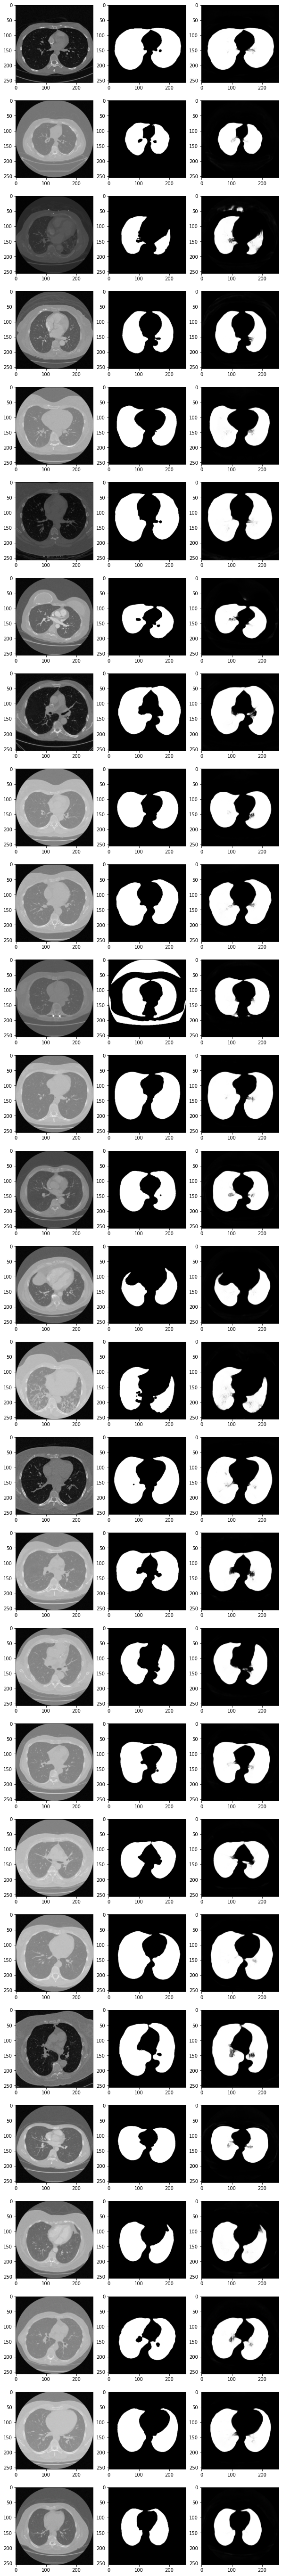

In [15]:
preds_final = model.predict(x_val)

fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds_final):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')